# EDA
The logic of EDA process:
1. **Check the basic situation of the data set**: the data type of each feature, whether there are missing values, outliers
2. **Data visualization**: Visualize the relationship between individual features and y and the relationship between multiple variables and y
3. **Data processing**: Process the data based on the data set, such as converting multi-classification variables to one-hot encoding, binary classification variables to 0-1 encoding, and time variables to time conversion
4. **Data verification**: Ensure that the data is directly available when the model is built

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Description of dataset

In [92]:
# load the dataset
df=pd.read_csv('../data/raw/bank-additional/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 1.1 Drop useless columns
Drop the useless columns including: **'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'**'

The reason why these features are considered useless is that this project explores the impact of individual factors on subscription activities, and the focus is on the individual. If these macro indicators are added, it will greatly interfere with the analysis of this project.

In [3]:
df=df.drop(columns=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


### 1.2 Basic description & info of dataset

In [4]:
df.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  campaign     41188 non-null  int64 
 12  pdays        41188 non-null  int64 
 13  previous     41188 non-null  int64 
 14  poutcome     41188 non-null  object
 15  y            41188 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.0+ MB


As We can see that after deletion, the dataset has 41,188 data points and 15 features, and none of the features have missing values.

### 1.3 Outliers detection

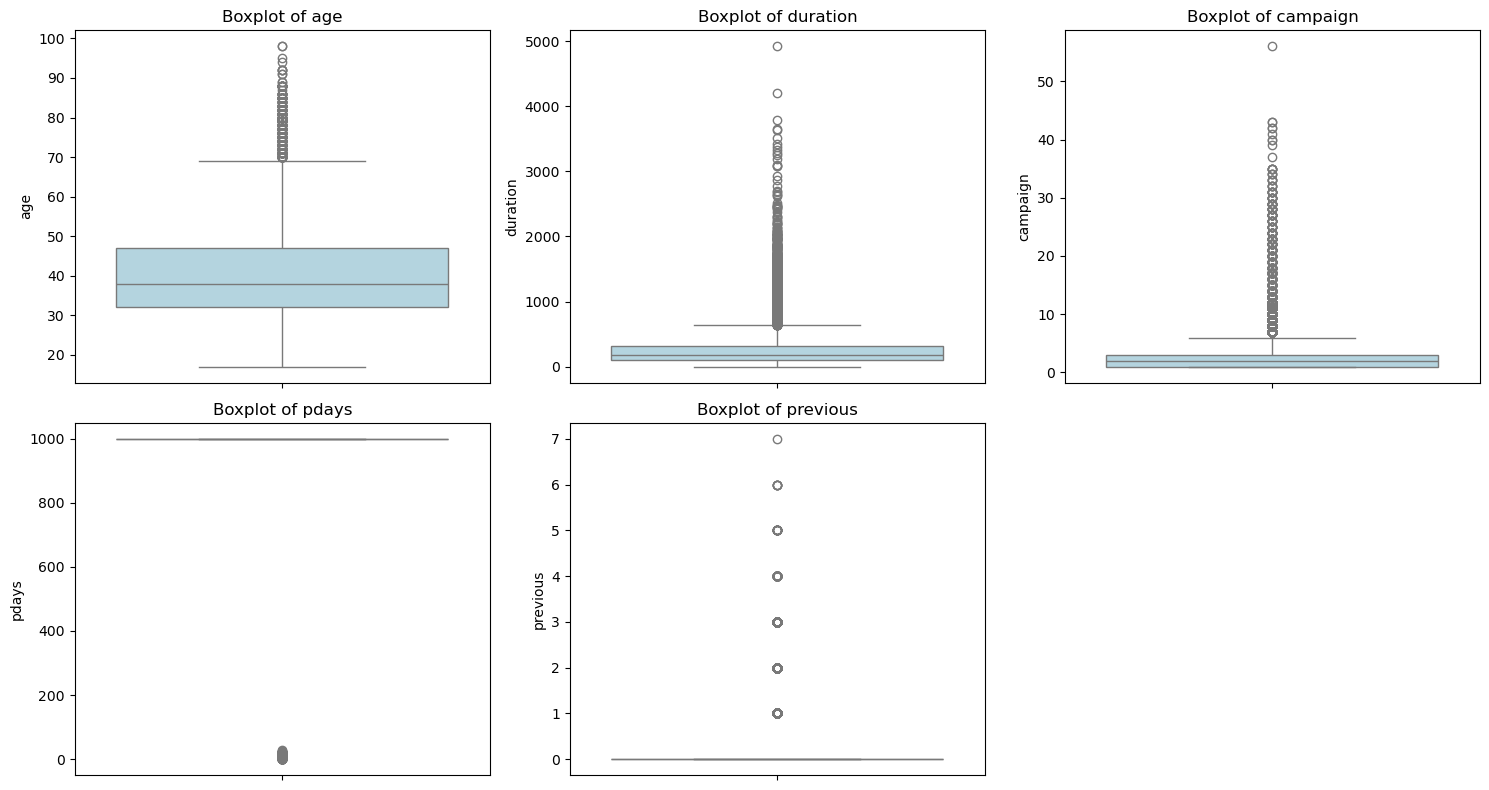

In [6]:
# List of numeric columns
numeric_columns = ["age", "duration", "campaign", "pdays", "previous"]

# Set figure size for better readability
plt.figure(figsize=(15, 8))

# Boxplots for outlier detection
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Histograms with KDE

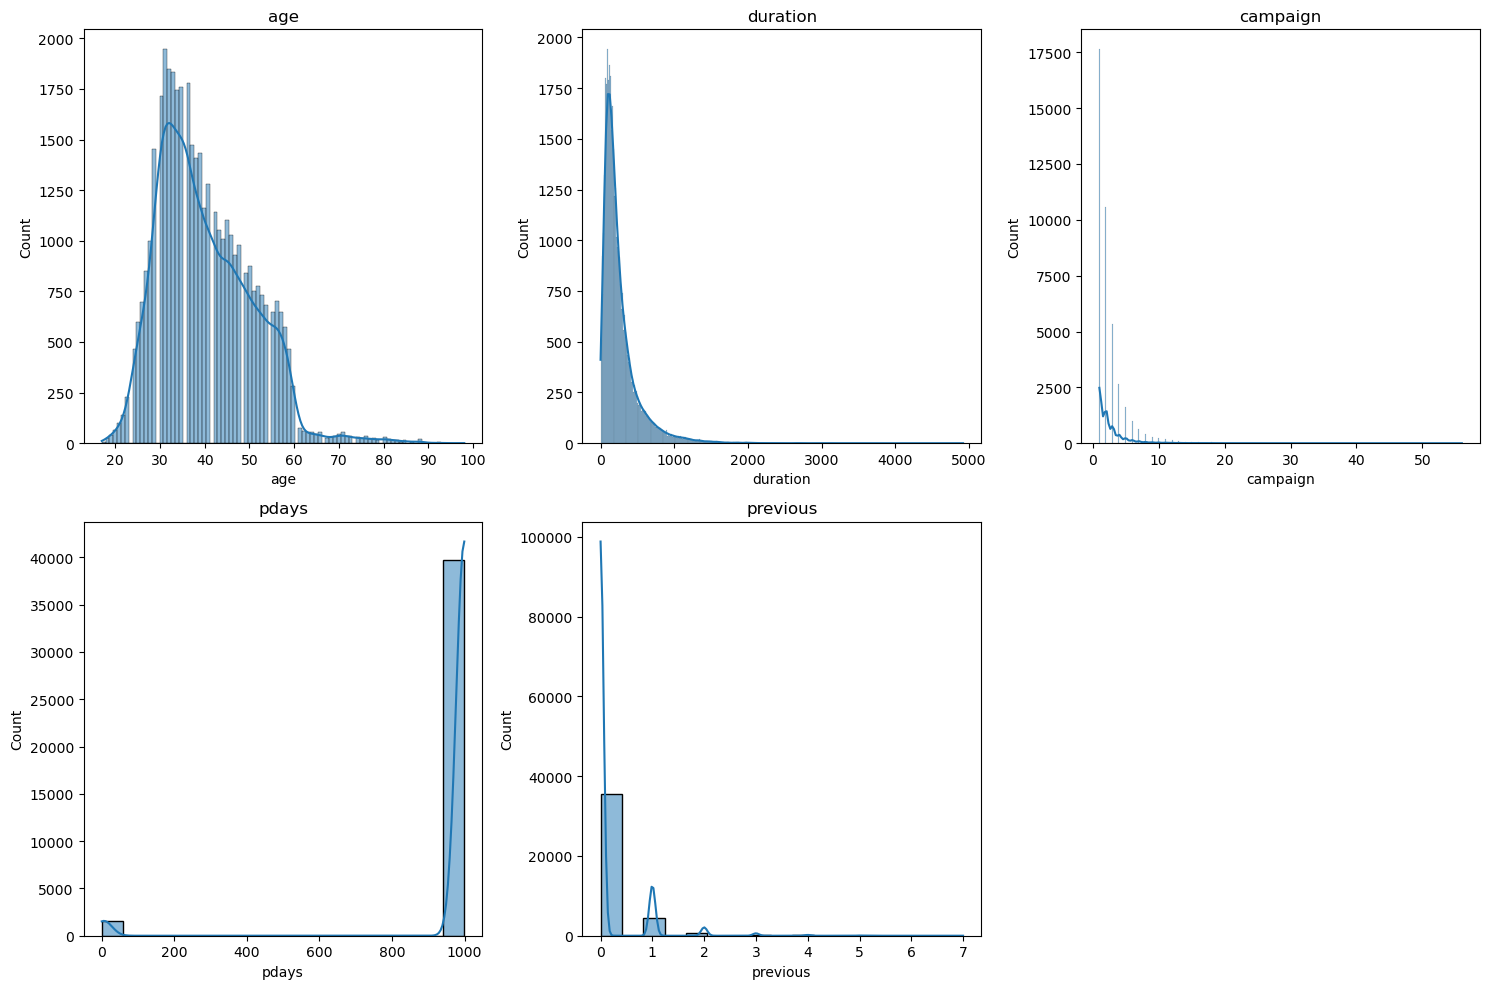

In [7]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

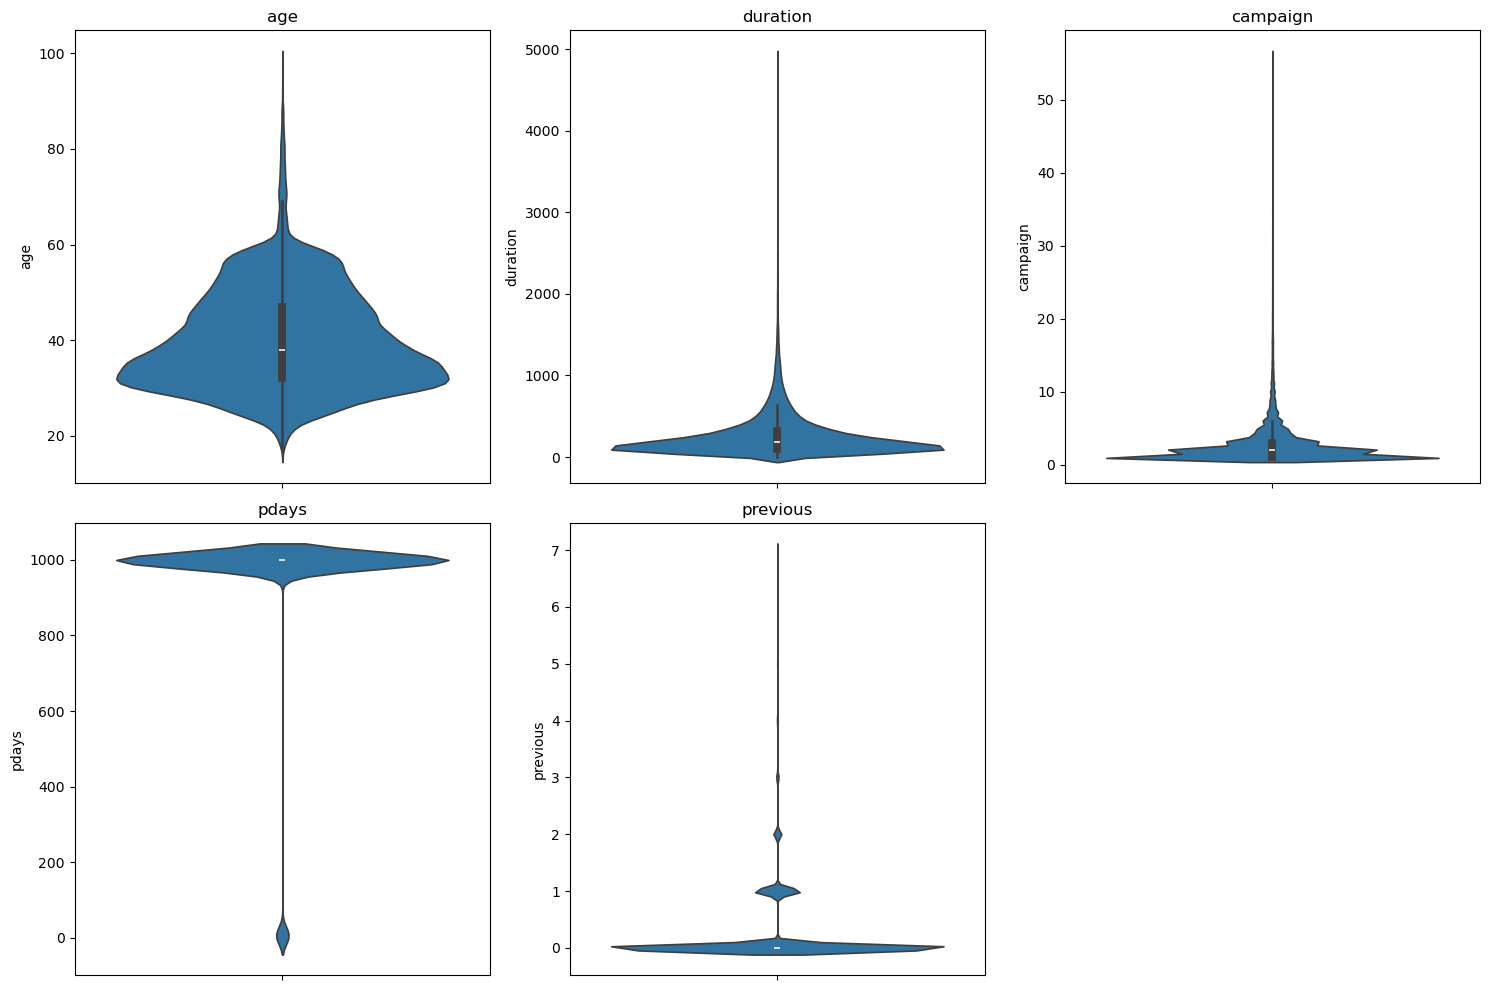

In [8]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

## 2 Visualisation

### 2.1 Feature distribution individually

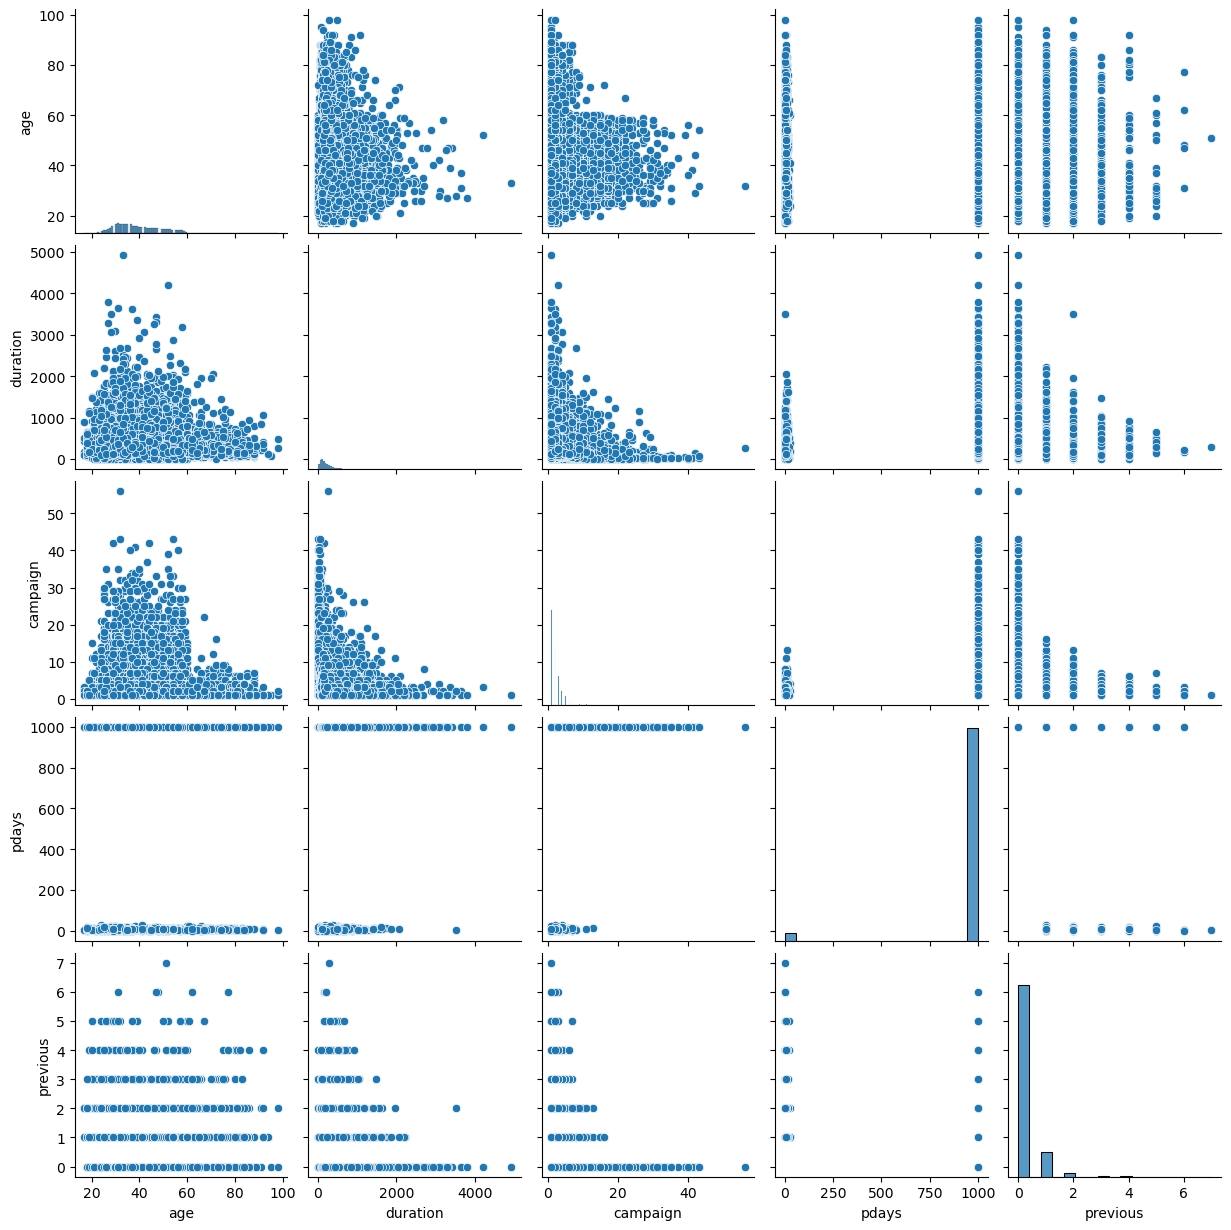

In [9]:
sns.pairplot(df[numeric_columns])
plt.show()

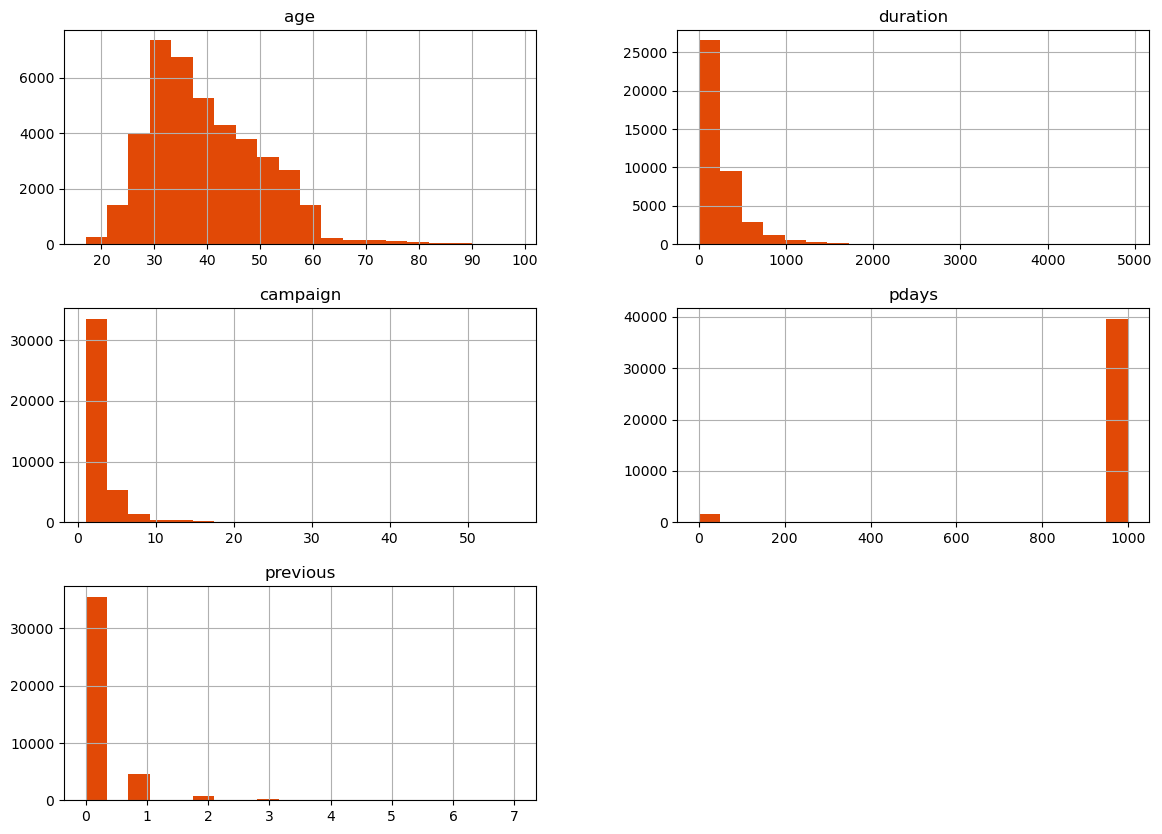

In [10]:

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

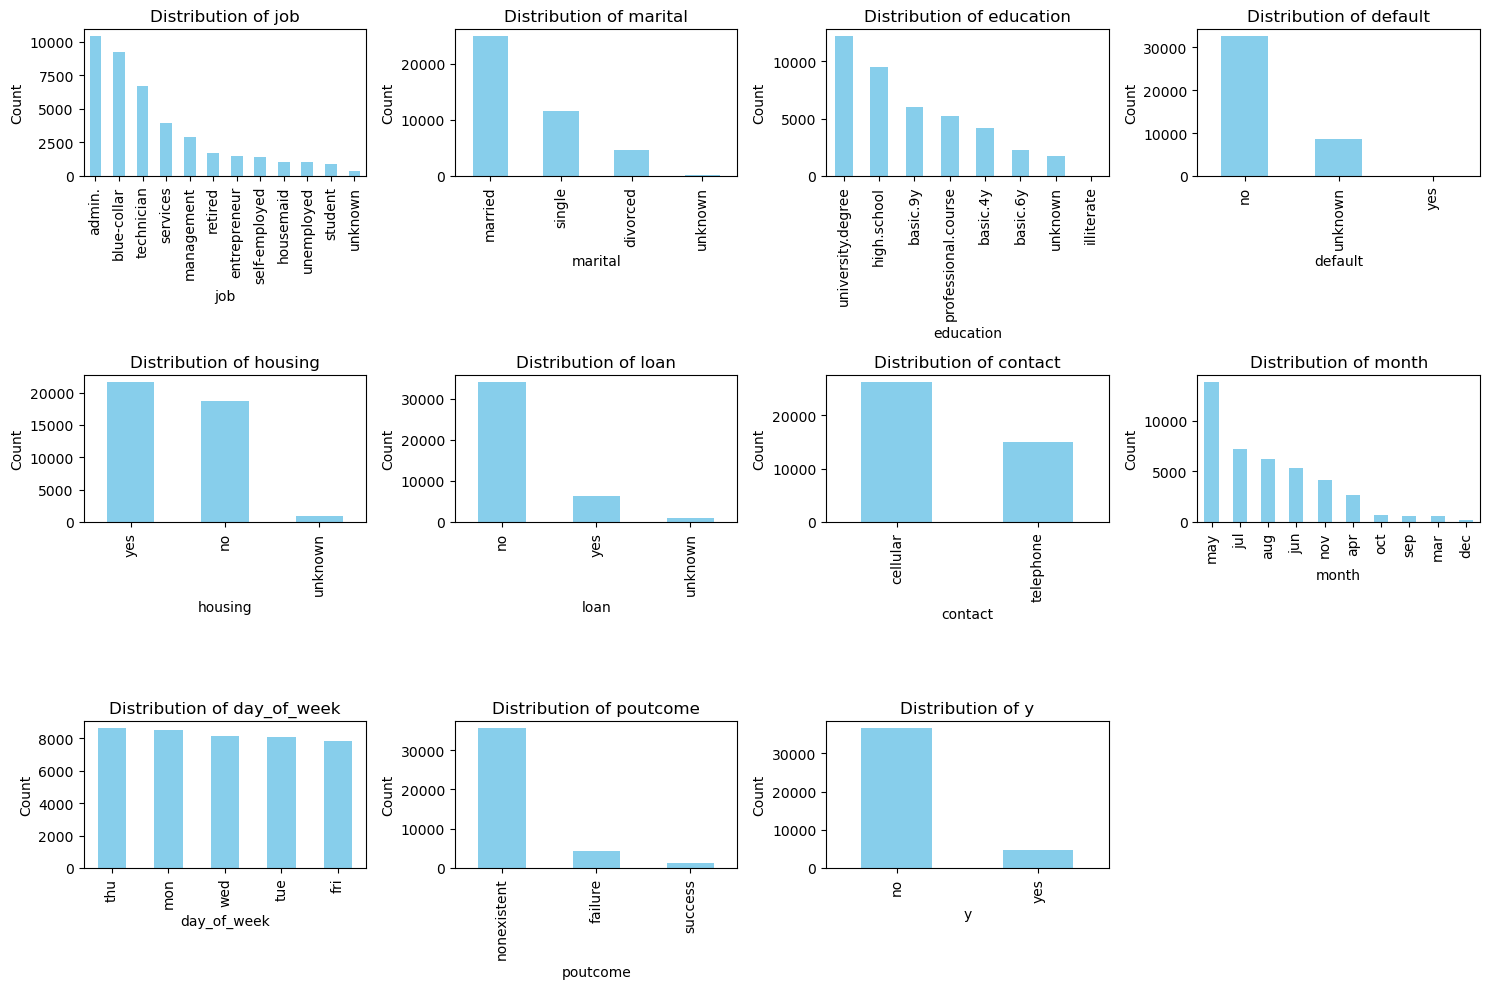

In [11]:


# Categorical columns
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

# Plot the bar plots for each categorical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns of subplots
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder
df1=df
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to apply label encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome', 'y']

# Apply label encoding to each categorical column
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

# Check the updated dataframe with encoded columns
print(df1.head())


   age  job  marital  education  default  housing  loan  contact month   
0   56    3        1          0        0        0     0        1   may  \
1   57    7        1          3        1        0     0        1   may   
2   37    7        1          3        0        2     0        1   may   
3   40    0        1          1        0        0     0        1   may   
4   56    7        1          3        0        0     2        1   may   

  day_of_week  duration  campaign  pdays  previous  poutcome  y  
0         mon       261         1    999         0         1  0  
1         mon       149         1    999         0         1  0  
2         mon       226         1    999         0         1  0  
3         mon       151         1    999         0         1  0  
4         mon       307         1    999         0         1  0  


In [13]:
#deal with time variable(month, day_of_week)
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

# Mapping Values
df1["month"] = df1["month"].map(month_mapping)
df1["day_of_week"] = df1["day_of_week"].map(day_mapping)

age&martial
age&default
job&education
default&contact
contact&month
previous&pdays
poutcome&previous

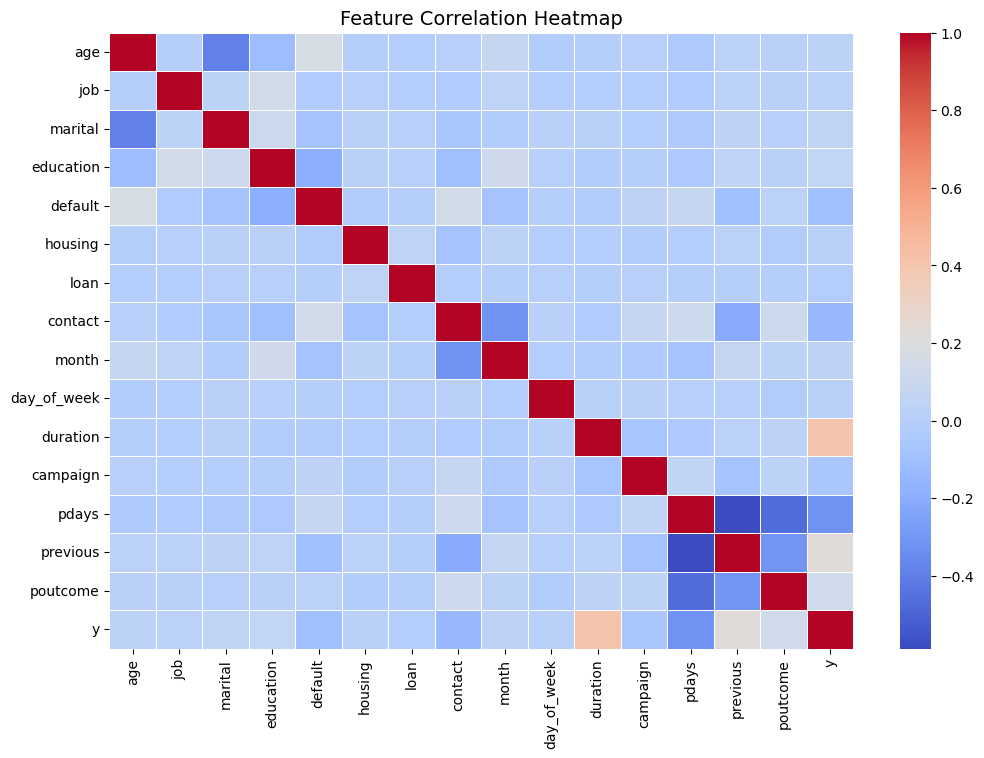

In [14]:
corr_matrix = df1.corr()
plt.figure(figsize=(12, 8))

# Heat Map
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap", fontsize=14)

# 显示图像
plt.show()

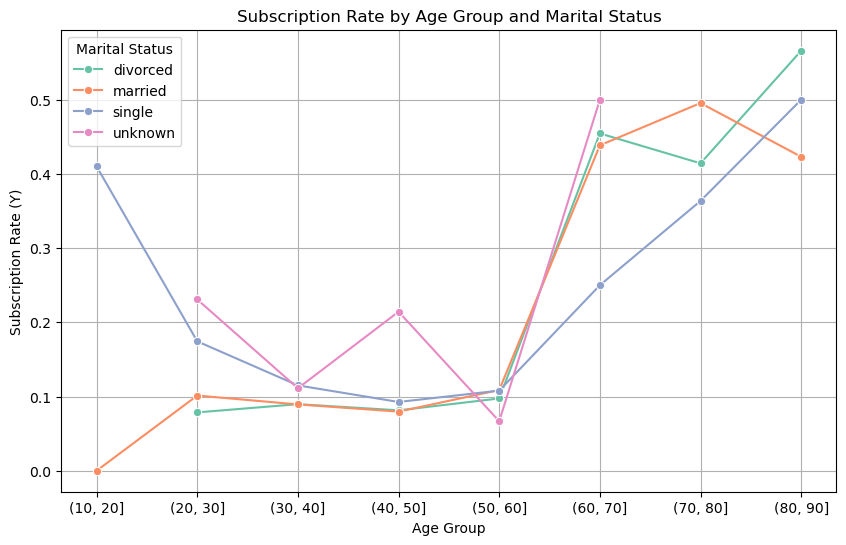

In [50]:
y_encoded_df = df.copy()
# Convert y to numeric type: 'yes' -> 1, 'no' -> 0
y_encoded_df['y'] = y_encoded_df['y'].map({'yes': 1, 'no': 0})
# Divide age into bins (e.g., 10-year intervals)
y_encoded_df['age_group'] = pd.cut(y_encoded_df['age'], bins=range(0, 100, 10))

# Group by marital and age_group and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['marital', 'age_group'])['y'].mean().reset_index()

# Convert age_group to string type
grouped_data['age_group'] = grouped_data['age_group'].astype(str)

# Draw a grouped bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='y', hue='marital', data=grouped_data, palette='Set2', marker='o')
plt.title('Subscription Rate by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Marital Status')
plt.grid(True)  # Add grid lines
plt.show()

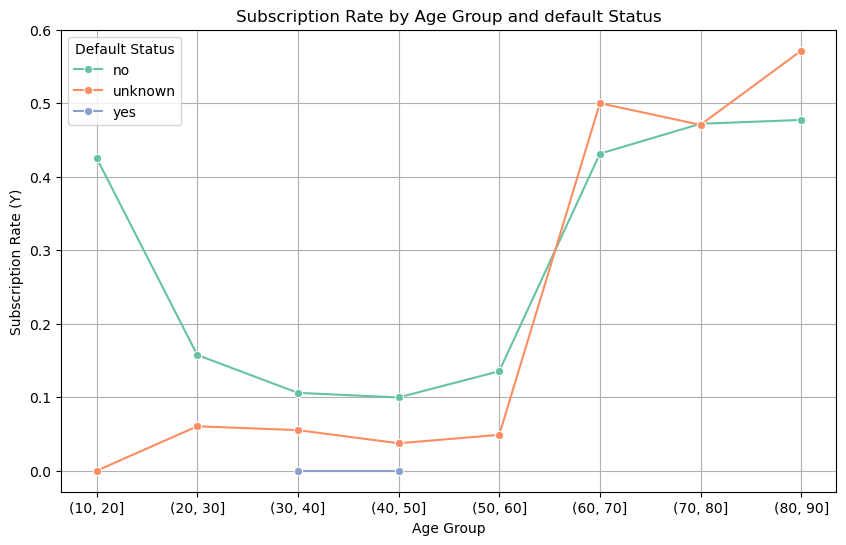

In [58]:
# Group by marital and age_group and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['default', 'age_group'])['y'].mean().reset_index()

# Convert age_group to string type
grouped_data['age_group'] = grouped_data['age_group'].astype(str)

# Draw a grouped bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='y', hue='default', data=grouped_data, palette='Set2', marker='o')
plt.title('Subscription Rate by Age Group and default Status')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Default Status')
plt.grid(True)  # Add grid lines
plt.show()

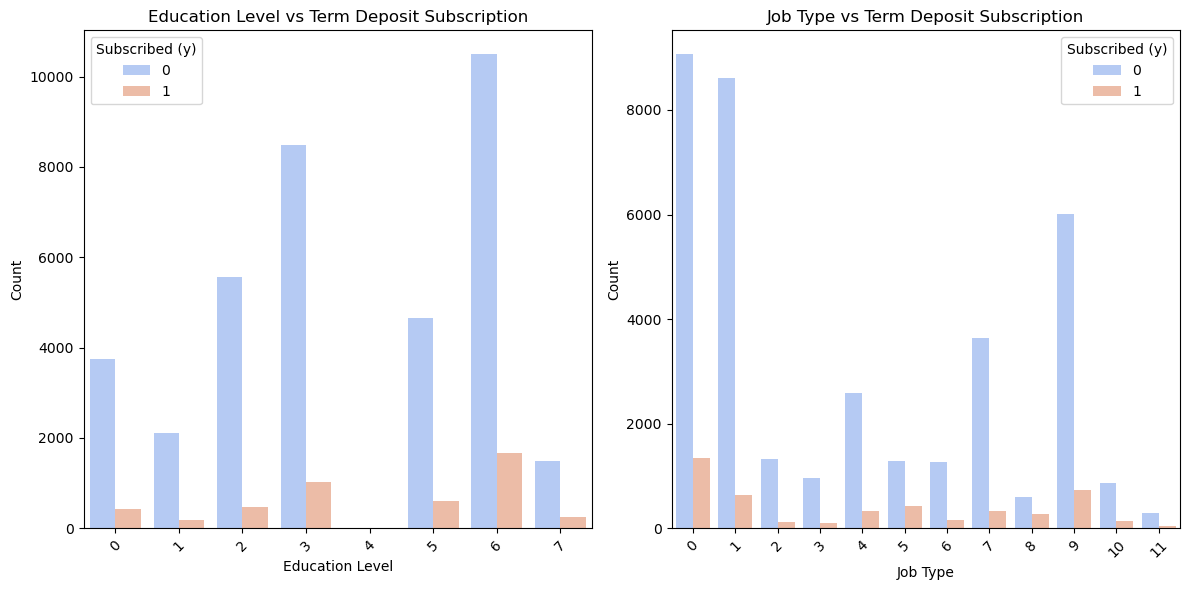

In [16]:
# Set figure size
plt.figure(figsize=(12, 6))

# Grouped bar plot for Education vs y
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="education", hue="y", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level vs Term Deposit Subscription")
plt.legend(title="Subscribed (y)")

# Grouped bar plot for Job vs y
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="job", hue="y", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.title("Job Type vs Term Deposit Subscription")
plt.legend(title="Subscribed (y)")

plt.tight_layout()
plt.show()


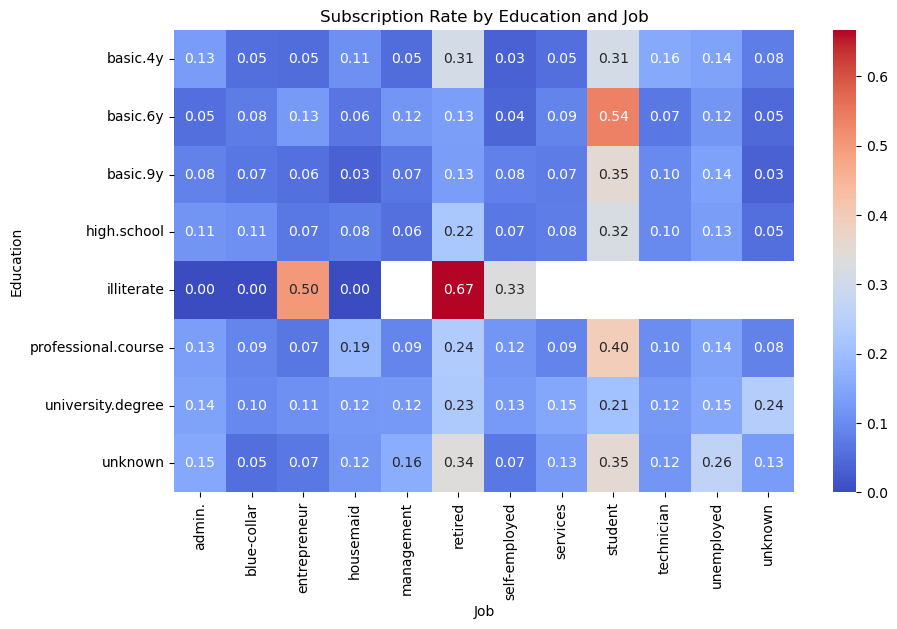

In [54]:
# Group by education and job and calculate the mean of y
heatmap_data = y_encoded_df.groupby(['education', 'job'])['y'].mean().unstack()

# Draw a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Subscription Rate by Education and Job')
plt.xlabel('Job')
plt.ylabel('Education')
plt.show()

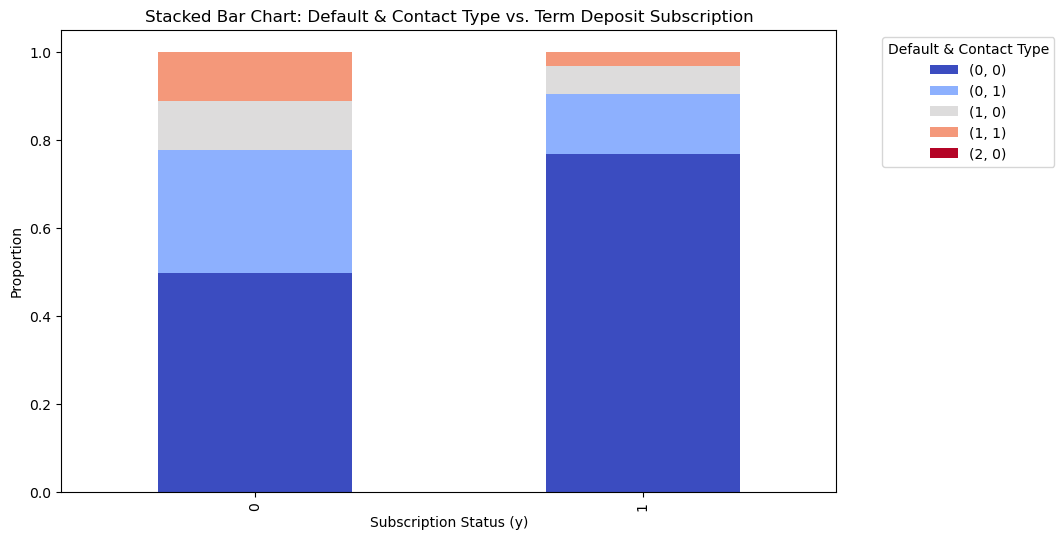

In [18]:


# Create a crosstab for stacked bar chart
df_grouped = pd.crosstab(index=[df['y']], columns=[df['default'], df['contact']])

# Normalize to get proportions
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")

# Labels and title
plt.xlabel("Subscription Status (y)")
plt.ylabel("Proportion")
plt.title("Stacked Bar Chart: Default & Contact Type vs. Term Deposit Subscription")
plt.legend(title="Default & Contact Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

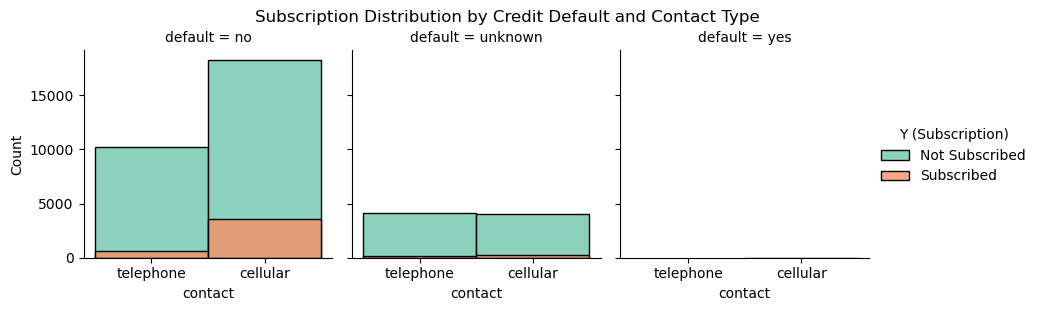

In [61]:
# Plotting faceted histograms
g = sns.FacetGrid(y_encoded_df, col='default', hue='y', palette='Set2')
g.map(sns.histplot, 'contact', kde=False, multiple='stack')
g.add_legend(title='Y (Subscription)', labels=['Not Subscribed', 'Subscribed'])
plt.suptitle('Subscription Distribution by Credit Default and Contact Type', y=1.02)
plt.show()

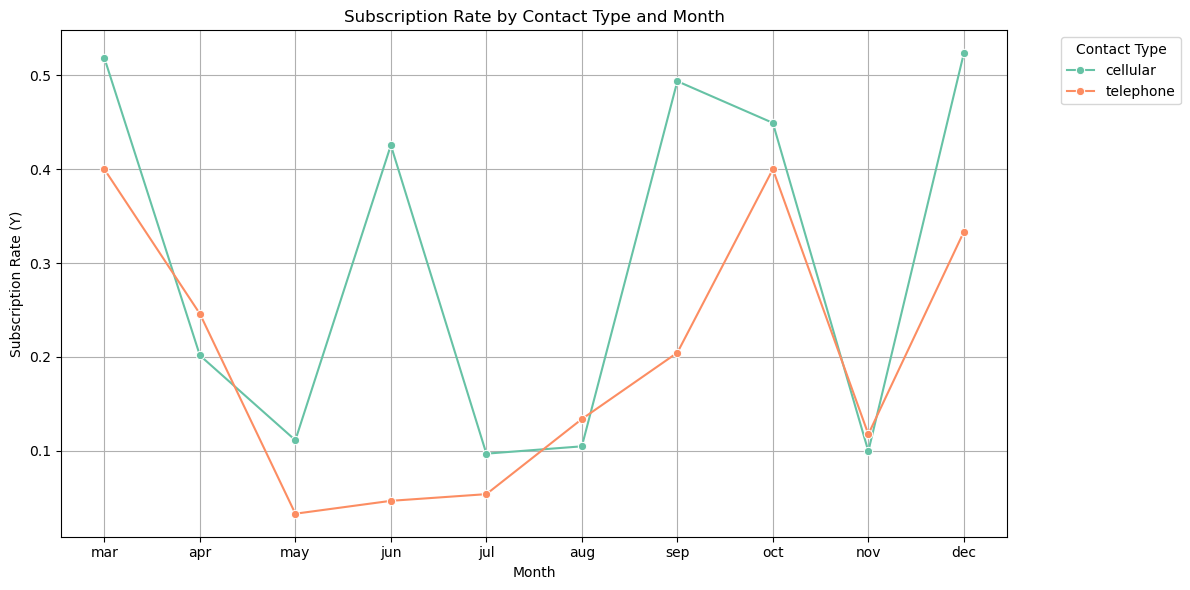

In [65]:
# Define the correct order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the month column to an ordinal categorical variable
y_encoded_df['month'] = pd.Categorical(y_encoded_df['month'], categories=month_order, ordered=True)
# Group by contact and month and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['contact', 'month'])['y'].mean().reset_index()
# Draw a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='y', hue='contact', data=grouped_data, palette='Set2', marker='o')
plt.title('Subscription Rate by Contact Type and Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Contact Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Adding Grid Lines
plt.tight_layout()
plt.show()

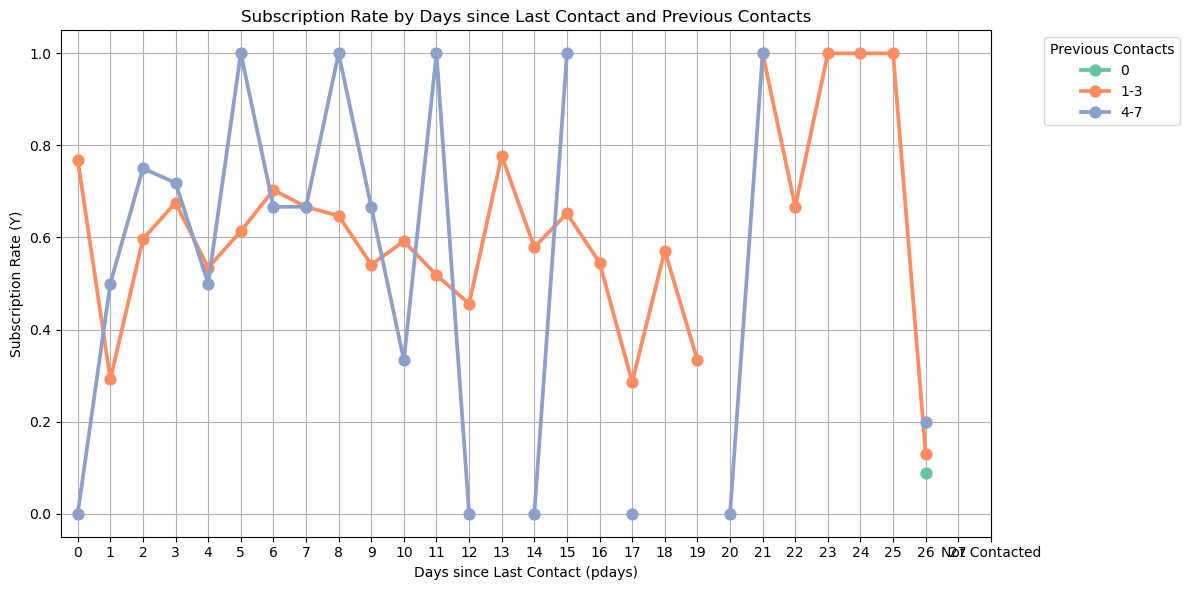

In [87]:
# Replace 999 in pdays with 28
y_encoded_df['pdays'] = y_encoded_df['pdays'].replace(999, 28)

# Bin previous
y_encoded_df['previous_bin'] = pd.cut(y_encoded_df['previous'], bins=[-1, 0, 3, 7], labels=['0', '1-3', '4-7'])

# Group by previous_bin and pdays and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['previous_bin', 'pdays'])['y'].mean().reset_index()

# Draw a dot plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='pdays', y='y', hue='previous_bin', data=grouped_data, palette='Set2')
plt.title('Subscription Rate by Days since Last Contact and Previous Contacts')
plt.xlabel('Days since Last Contact (pdays)')
plt.ylabel('Subscription Rate (Y)')

# Customize the X-axis scale
plt.xticks(list(range(0, 29)), list(range(0, 28)) + ['Not Contacted'])
plt.legend(title='Previous Contacts', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

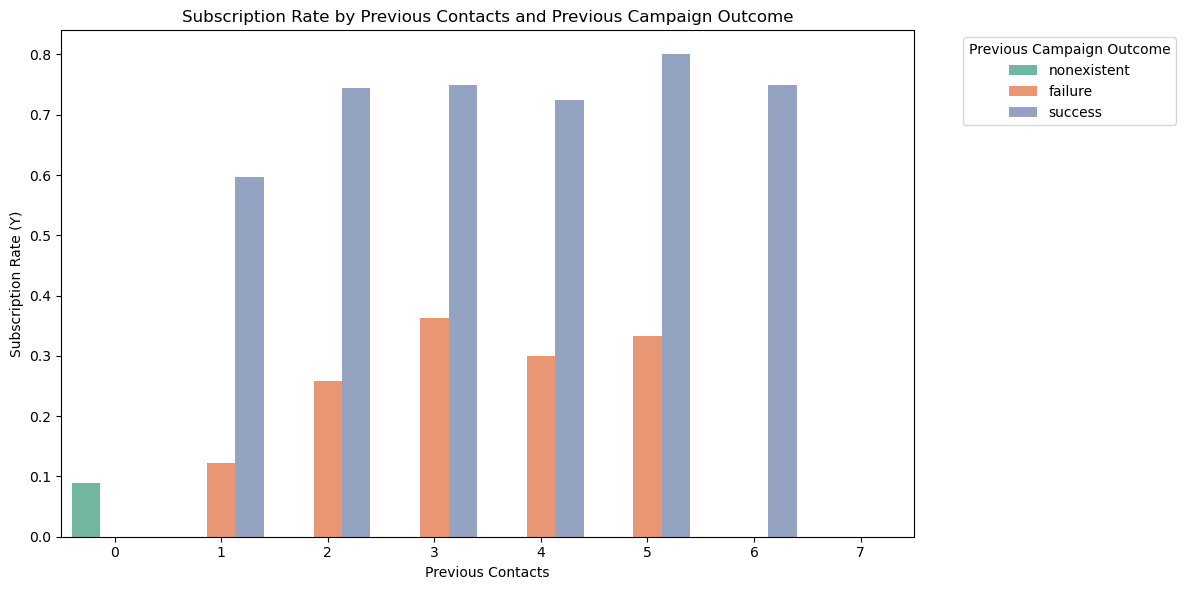

In [88]:
# Group by poutcome and previous and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['poutcome', 'previous'])['y'].mean().reset_index()

# Draw a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='previous', y='y', hue='poutcome', data=grouped_data, palette='Set2')
plt.title('Subscription Rate by Previous Contacts and Previous Campaign Outcome')
plt.xlabel('Previous Contacts')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Previous Campaign Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

age&martial 1
age&default 1
job&education 1
default&contact 1
contact&month 1
previous&pdays 1
poutcome&previous 1